
<h1>Introduction</h1>
<p>In this project, we aim to predict diabetes outcomes using various machine learning models, including Logistic Regression, Random Forest, Gradient Boosted Trees, and XGBoost. The dataset includes several health indicators and socioeconomic factors.</p>

<h2>Data Exploration and Preparation</h2>
<p>This section covers loading the dataset, exploring the data, handling missing values, and preparing features for modeling.</p>


In [0]:
df1 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/prajpras@gmu.edu/diabetes_012_health_indicators_BRFSS2015-2.csv")
display(df1)

Diabetes_012 HighBP HighChol CholCheck BMI Smoker Stroke HeartDiseaseorAttack PhysActivity Fruits Veggies HvyAlcoholConsump AnyHealthcare NoDocbcCost GenHlth MentHlth PhysHlth DiffWalk Sex Age Education Income 0.0 1.0 1.0 1.0 40.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 5.0 18.0 15.0 1.0 0.0 9.0 4.0 3.0 0.0 0.0 0.0 0.0 25.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 3.0 0.0 0.0 0.0 0.0 7.0 6.0 1.0 0.0 1.0 1.0 1.0 28.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 1.0 5.0 30.0 30.0 1.0 0.0 9.0 4.0 8.0 0.0 1.0 0.0 1.0 27.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 2.0 0.0 0.0 0.0 0.0 11.0 3.0 6.0 0.0 1.0 1.0 1.0 24.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 2.0 3.0 0.0 0.0 0.0 11.0 5.0 4.0 0.0 1.0 1.0 1.0 25.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 2.0 0.0 2.0 0.0 1.0 10.0 6.0 8.0 0.0 1.0 0.0 1.0 30.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 3.0 0.0 14.0 0.0 0.0 9.0 6.0 7.0 0.0 1.0 1.0 1.0 25.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 3.0 0.0 0.0 1.0 0.0 11.0 4.0 4.0 2.0 1.0 1.0 1.0 30.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 5.0 30.0 30.0 1.0 0.0 9.0 5.0 1.0 0.0 0.0 0.0 1.0 24.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 2.0 0.0 0.0 0.0 1.0 8.0 4.0 3.0 2.0 0.0 0.0 1.0 25.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 3.0 0.0 0.0 0.0 1.0 13.0 6.0 8.0 0.0 1.0 1.0 1.0 34.0 1.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 3.0 0.0 30.0 1.0 0.0 10.0 5.0 1.0 0.0 0.0 0.0 1.0 26.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 3.0 0.0 15.0 0.0 0.0 7.0 5.0 7.0 2.0 1.0 1.0 1.0 28.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 4.0 0.0 0.0 1.0 0.0 11.0 4.0 6.0 0.0 0.0 1.0 1.0 33.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0 4.0 30.0 28.0 0.0 0.0 4.0 6.0 2.0 0.0 1.0 0.0 1.0 33.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 2.0 5.0 0.0 0.0 0.0 6.0 6.0 8.0 0.0 1.0 1.0 1.0 21.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 3.0 0.0 0.0 0.0 0.0 10.0 4.0 3.0 2.0 0.0 0.0 1.0 23.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 2.0 0.0 0.0 0.0 1.0 7.0 5.0 6.0 0.0 0.0 0.0 0.0 23.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 2.0 15.0 0.0 0.0 0.0 2.0 6.0 7.0 0.0 0.0 1.0 1.0 28.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 2.0 10.0 0.0 0.0 1.0 4.0 6.0 8.0 0.0 1.0 1.0 1.0 22.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 3.0 30.0 0.0 1.0 0.0 12.0 4.0 4.0 0.0 1.0 1.0 1.0 38.0 1.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 5.0 15.0 30.0 1.0 0.0 13.0 2.0 3.0 0.0 0.0 0.0 1.0 28.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 3.0 0.0 7.0 0.0 1.0 5.0 5.0 5.0 2.0 1.0 0.0 1.0 27.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 13.0 5.0 4.0 0.0 1.0 1.0 1.0 28.0 1.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 3.0 6.0 0.0 1.0 0.0 9.0 4.0 6.0 0.0 0.0 0.0 1.0 32.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 2.0 0.0 0.0 0.0 0.0 5.0 6.0 8.0 2.0 1.0 1.0 1.0 37.0 1.0 1.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 5.0 0.0 0.0 1.0 1.0 10.0 6.0 5.0 2.0 1.0 1.0 1.0 28.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 4.0 0.0 0.0 0.0 1.0 12.0 2.0 4.0 2.0 1.0 1.0 1.0 27.0 1.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 4.0 20.0 20.0 1.0 0.0 8.0 4.0 7.0 0.0 0.0 1.0 1.0 31.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 12.0 6.0 8.0 2.0 1.0 1.0 1.0 34.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 4.0 0.0 7.0 1.0 0.0 9.0 5.0 4.0 0.0 1.0 0.0 1.0 33.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 1.0 13.0 3.0 3.0 0.0 0.0 0.0 1.0 23.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0 2.0 0.0 0.0 0.0 6.0 4.0 8.0 0.0 1.0 0.0 1.0 31.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 3.0 0.0 0.0 0.0 1.0 11.0 6.0 2.0 2.0 1.0 1.0 1.0 24.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 2.0 0.0 0.0 0.0 0.0 12.0 3.0 3.0 0.0 1.0 0.0 1.0 26.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 2.0 0.0 0.0 0.0 0.0 9.0 4.0 4.0 0.0 1.0 1.0 1.0 24.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 3.0 5.0 3.0 1.0 1.0 8.0 4.0 3.0 0.0 0.0 0.0 1.0 22.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 2.0 0.0 10.0 0.0 0.0 12.0 5.0 7.0 0.0 0.0 0.0 1.0 26.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 4.0 5.0 3.0 0.0 1.0 1.0 1.0 24.0 1.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 5.0 0.0 30.0 0.0 1.0 9.0 3.0 1.0 0.0 0.0 0.0 1.0 26.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 2.0 0.0 1.0 0.0 0.0 4.0 6.0 7.0 2.0 1.0 0.0 1.0 31.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 3.0 0.0 5.0 0.0 0.0 13.0 4.0 4.0 0.0 0.0 0.0 1

In [0]:
from pyspark.sql.functions import col, sum
missing_values = df1.select([sum(col(column).isNull().cast("int")).alias(column) for column in df1.columns])
display(missing_values)



Diabetes_012 HighBP HighChol CholCheck BMI Smoker Stroke HeartDiseaseorAttack PhysActivity Fruits Veggies HvyAlcoholConsump AnyHealthcare NoDocbcCost GenHlth MentHlth PhysHlth DiffWalk Sex Age Education Income 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [0]:

duplicate_count = df1.count() - df1.distinct().count()
print("Number of duplicate rows:", duplicate_count)

df1 = df1.dropDuplicates()


Number of duplicate rows: 23899


In [0]:

df1_outlier = df1.filter((df1["BMI"] >= 10) & (df1["BMI"] <= 60))
df1_outlier.show()



+------------+------+--------+---------+----+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+----+---------+------+
|Diabetes_012|HighBP|HighChol|CholCheck| BMI|Smoker|Stroke|HeartDiseaseorAttack|PhysActivity|Fruits|Veggies|HvyAlcoholConsump|AnyHealthcare|NoDocbcCost|GenHlth|MentHlth|PhysHlth|DiffWalk|Sex| Age|Education|Income|
+------------+------+--------+---------+----+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+----+---------+------+
|         0.0|   1.0|     1.0|      1.0|21.0|   0.0|   0.0|                 0.0|         1.0|   1.0|    1.0|              0.0|          1.0|        0.0|    3.0|     0.0|     0.0|     0.0|0.0|10.0|      4.0|   3.0|
|         0.0|   0.0|     0.0|      0.0|23.0|   0.0|   0.0|                 0.0|         0.0|   0.0|    1.0|              0.0|          1.0|    

<h2>Resampling Imbalanced Classes for Diabetes_012</h2>

In [0]:
from pyspark.sql.functions import col, concat_ws
df_zero = df1_outlier.filter(col("Diabetes_012") == 0)
df_two = df1_outlier.filter(col("Diabetes_012") == 2)
df_zero_sampled = df_zero.sample(withReplacement=False, fraction=35000 / df_zero.count(), seed=42)
df_combined = df_zero_sampled.union(df_two)
df1_filtered = df_combined.drop("scaled_features")
print("Count of Diabetes_012 = 0 (sampled):", df_combined.filter(col("Diabetes_012") == 0).count())
print("Count of Diabetes_012 = 2:", df1_filtered.filter(col("Diabetes_012") == 2).count())
df1_filtered.show(10, truncate=False)
count_0 = df1_filtered.filter(col("Diabetes_012") == 0).count()
count_2 = df1_filtered.filter(col("Diabetes_012") == 2).count()
print(f"Number of rows where Diabetes_012 = 0: {count_0}")
print(f"Number of rows where Diabetes_012 = 2: {count_2}")

Count of Diabetes_012 = 0 (sampled): 35078
Count of Diabetes_012 = 2: 34926
+------------+------+--------+---------+----+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+----+---------+------+
|Diabetes_012|HighBP|HighChol|CholCheck|BMI |Smoker|Stroke|HeartDiseaseorAttack|PhysActivity|Fruits|Veggies|HvyAlcoholConsump|AnyHealthcare|NoDocbcCost|GenHlth|MentHlth|PhysHlth|DiffWalk|Sex|Age |Education|Income|
+------------+------+--------+---------+----+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+----+---------+------+
|0.0         |1.0   |0.0     |1.0      |31.0|0.0   |0.0   |0.0                 |1.0         |1.0   |1.0    |0.0              |1.0          |0.0        |2.0    |0.0     |0.0     |0.0     |0.0|7.0 |6.0      |4.0   |
|0.0         |0.0   |0.0     |1.0      |24.0|0.0   |0.0   |0.0      

<h2>Feature Engineering</h2>
<p>Key steps include scaling numerical features, encoding categorical variables, and creating new derived features.</p>


In [0]:
from pyspark.sql.types import DoubleType
from pyspark.ml.feature import StandardScaler, VectorAssembler

df1_filtered = df1_filtered.withColumn("BMI", df1_filtered["BMI"].cast(DoubleType())) \
                           .withColumn("HighBP", df1_filtered["HighBP"].cast(DoubleType())) \
                           .withColumn("HighChol", df1_filtered["HighChol"].cast(DoubleType()))

numerical_cols = ["BMI", "HighBP", "HighChol"]
assembler = VectorAssembler(inputCols=numerical_cols, outputCol="features_vector")
df1_filtered = assembler.transform(df1_filtered)

scaler = StandardScaler(inputCol="features_vector", outputCol="scaled_features", withMean=True, withStd=True)
scaler_model = scaler.fit(df1_filtered)
df1_filtered = scaler_model.transform(df1_filtered)

df1_filtered.select("BMI", "HighBP", "HighChol", "features_vector", "scaled_features").show()




+----+------+--------+---------------+--------------------+
| BMI|HighBP|HighChol|features_vector|     scaled_features|
+----+------+--------+---------------+--------------------+
|31.0|   1.0|     0.0| [31.0,1.0,0.0]|[0.18167173598832...|
|24.0|   0.0|     0.0| [24.0,0.0,0.0]|[-0.8764357448859...|
|41.0|   0.0|     1.0| [41.0,0.0,1.0]|[1.69325385152301...|
|42.0|   0.0|     0.0| [42.0,0.0,0.0]|[1.84441206307648...|
|23.0|   0.0|     0.0| [23.0,0.0,0.0]|[-1.0275939564394...|
|22.0|   0.0|     0.0| [22.0,0.0,0.0]|[-1.1787521679928...|
|24.0|   1.0|     1.0| [24.0,1.0,1.0]|[-0.8764357448859...|
|28.0|   1.0|     0.0| [28.0,1.0,0.0]|[-0.2718028986720...|
|28.0|   0.0|     0.0| [28.0,0.0,0.0]|[-0.2718028986720...|
|22.0|   0.0|     0.0| [22.0,0.0,0.0]|[-1.1787521679928...|
|25.0|   0.0|     0.0| [25.0,0.0,0.0]|[-0.7252775333324...|
|19.0|   0.0|     0.0| [19.0,0.0,0.0]|[-1.6322268026532...|
|30.0|   0.0|     0.0| [30.0,0.0,0.0]|[0.03051352443485...|
|42.0|   0.0|     0.0| [42.0,0.0,0.0]|[1

In [0]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="Smoker", outputCol="Smoker_index")
df1_filtered = indexer.fit(df1_filtered).transform(df1_filtered)


In [0]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="Diabetes_012", outputCol="label")
df1_filtered = indexer.fit(df1_filtered).transform(df1_filtered)



In [0]:
df1_filtered.printSchema()


root
 |-- Diabetes_012: string (nullable = true)
 |-- HighBP: double (nullable = true)
 |-- HighChol: double (nullable = true)
 |-- CholCheck: string (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoker: string (nullable = true)
 |-- Stroke: string (nullable = true)
 |-- HeartDiseaseorAttack: string (nullable = true)
 |-- PhysActivity: string (nullable = true)
 |-- Fruits: string (nullable = true)
 |-- Veggies: string (nullable = true)
 |-- HvyAlcoholConsump: string (nullable = true)
 |-- AnyHealthcare: string (nullable = true)
 |-- NoDocbcCost: string (nullable = true)
 |-- GenHlth: string (nullable = true)
 |-- MentHlth: string (nullable = true)
 |-- PhysHlth: string (nullable = true)
 |-- DiffWalk: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Income: string (nullable = true)
 |-- features_vector: vector (nullable = true)
 |-- scaled_features: vector (nullable = true)
 |-- Smok

In [0]:
from pyspark.ml.feature import StringIndexer

remaining_categorical_cols = [
    "CholCheck", "Stroke", "HeartDiseaseorAttack", "PhysActivity",
    "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", 
    "NoDocbcCost", "GenHlth", "DiffWalk", "Sex", "Age", 
    "Education", "Income"
]

for col in remaining_categorical_cols:
    indexer = StringIndexer(inputCol=col, outputCol=f"{col}_index")
    df1_filtered = indexer.fit(df1_filtered).transform(df1_filtered)

df1_filtered.printSchema()



root
 |-- Diabetes_012: string (nullable = true)
 |-- HighBP: double (nullable = true)
 |-- HighChol: double (nullable = true)
 |-- CholCheck: string (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoker: string (nullable = true)
 |-- Stroke: string (nullable = true)
 |-- HeartDiseaseorAttack: string (nullable = true)
 |-- PhysActivity: string (nullable = true)
 |-- Fruits: string (nullable = true)
 |-- Veggies: string (nullable = true)
 |-- HvyAlcoholConsump: string (nullable = true)
 |-- AnyHealthcare: string (nullable = true)
 |-- NoDocbcCost: string (nullable = true)
 |-- GenHlth: string (nullable = true)
 |-- MentHlth: string (nullable = true)
 |-- PhysHlth: string (nullable = true)
 |-- DiffWalk: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Income: string (nullable = true)
 |-- features_vector: vector (nullable = true)
 |-- scaled_features: vector (nullable = true)
 |-- Smok

In [0]:
from pyspark.ml.feature import VectorAssembler

feature_columns = [
    "scaled_features", "CholCheck_index", "Stroke_index", "HeartDiseaseorAttack_index",
    "PhysActivity_index", "Fruits_index", "Veggies_index", "HvyAlcoholConsump_index",
    "AnyHealthcare_index", "NoDocbcCost_index", "GenHlth_index", "DiffWalk_index",
    "Sex_index", "Age_index", "Education_index", "Income_index"
]

assembler = VectorAssembler(inputCols=feature_columns, outputCol="final_features")
df1_filtered = assembler.transform(df1_filtered)

df1_filtered.select("final_features", "label").show(5)



+--------------------+-----+
|      final_features|label|
+--------------------+-----+
|(18,[0,1,2,12,15,...|  0.0|
|(18,[0,1,2,12,15,...|  0.0|
|[1.69325385152301...|  0.0|
|(18,[0,1,2,6,7,12...|  0.0|
|(18,[0,1,2,7,12,1...|  0.0|
+--------------------+-----+
only showing top 5 rows



In [0]:

train_df, test_df = df1_filtered.randomSplit([0.8, 0.2], seed=42)

print("Training data count:", train_df.count())
print("Testing data count:", test_df.count())



Training data count: 56241
Testing data count: 13900


<h2>Model Selection and Training</h2>

<h3>Logistic Regression</h3>
<p>Trained Logistic Regression to serve as a baseline model for comparison with other advanced techniques.</p>


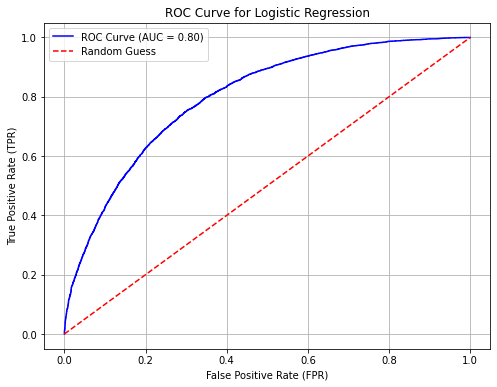

Logistic Regression Accuracy: 0.7243165467625899
Logistic Regression ROC-AUC: 0.7990840279911944


In [0]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import col, udf
from pyspark.sql.types import FloatType
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

lr = LogisticRegression(featuresCol="final_features", labelCol="label")

lr_model = lr.fit(train_df)

predictions = lr_model.transform(test_df)

extract_probability_udf = udf(lambda prob: float(prob[1]), FloatType())
predictions = predictions.withColumn("probability_class_1", extract_probability_udf(col("probability")))

roc_data = predictions.select("label", "probability_class_1").toPandas()

y_true = roc_data["label"]
y_scores = roc_data["probability_class_1"]

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = roc_auc_score(y_true, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="best")
plt.grid()
plt.show()

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print(f"Logistic Regression Accuracy: {accuracy}")
print(f"Logistic Regression ROC-AUC: {roc_auc}")


<h3>Random Forest Classifier</h3>
<p>Implemented Random Forest to utilize ensemble learning for improved accuracy.</p>


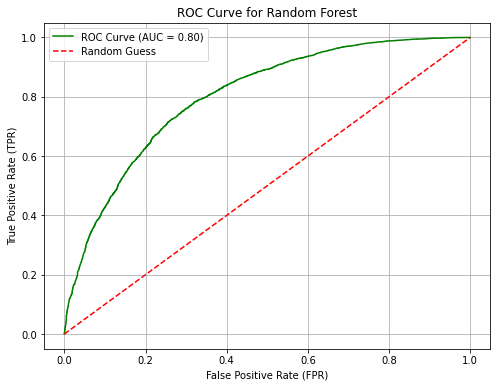

Random Forest Accuracy: 0.7294964028776978
Random Forest ROC-AUC: 0.8013820737072299


In [0]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import col, udf
from pyspark.sql.types import FloatType
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

rf = RandomForestClassifier(featuresCol="final_features", labelCol="label", numTrees=100)

rf_model = rf.fit(train_df)

rf_predictions = rf_model.transform(test_df)

extract_probability_udf = udf(lambda prob: float(prob[1]), FloatType())
rf_predictions = rf_predictions.withColumn("probability_class_1", extract_probability_udf(col("probability")))

roc_data = rf_predictions.select("label", "probability_class_1").toPandas()

y_true = roc_data["label"]
y_scores = roc_data["probability_class_1"]

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = roc_auc_score(y_true, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="green")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Random Forest")
plt.legend(loc="best")
plt.grid()
plt.show()

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
rf_accuracy = evaluator.evaluate(rf_predictions)

print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Random Forest ROC-AUC: {roc_auc}")




<h3>Gradient Boosted Trees</h3>
<p>Gradient Boosted Trees were trained to further boost performance using boosting techniques.</p>


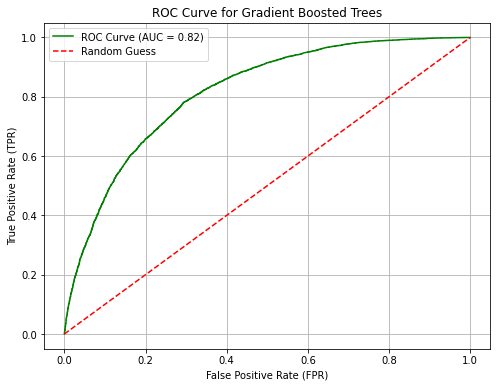

Gradient Boosted Trees Accuracy: 0.7421582733812949
Gradient Boosted Trees ROC-AUC: 0.8158407519472076


In [0]:
from pyspark.ml.classification import GBTClassifier
from pyspark.sql.functions import col, udf
from pyspark.sql.types import FloatType
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

gbt = GBTClassifier(featuresCol="final_features", labelCol="label", maxIter=50, maxDepth=5, maxBins=32)

gbt_model = gbt.fit(train_df)

gbt_predictions = gbt_model.transform(test_df)

extract_probability_udf = udf(lambda prob: float(prob[1]), FloatType())
gbt_predictions = gbt_predictions.withColumn("probability_class_1", extract_probability_udf(col("probability")))

roc_data = gbt_predictions.select("label", "probability_class_1").toPandas()

y_true = roc_data["label"]
y_scores = roc_data["probability_class_1"]

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = roc_auc_score(y_true, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="green")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Gradient Boosted Trees")
plt.legend(loc="best")
plt.grid()
plt.show()

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
gbt_accuracy = evaluator.evaluate(gbt_predictions)

print(f"Gradient Boosted Trees Accuracy: {gbt_accuracy}")
print(f"Gradient Boosted Trees ROC-AUC: {roc_auc}")


<h3>XGBoost Model</h3>
<p>XGBoost was used for efficient and scalable training with advanced boosting algorithms.</p>


XGBoost Accuracy: 0.743453237410072


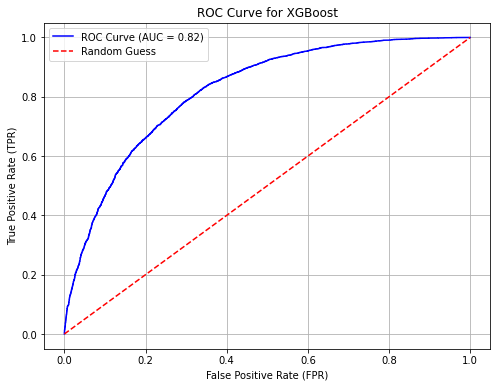

XGBoost ROC-AUC: 0.8199749837872449


In [0]:
from xgboost import XGBClassifier
from pyspark.sql.functions import col
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

columns_to_keep = [
    "label", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack",
    "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump",
    "AnyHealthcare", "NoDocbcCost", "GenHlth", "MentHlth",
    "PhysHlth", "DiffWalk", "Sex", "Age", "Education", "Income", "BMI", "HighBP", "HighChol"
]

train_pandas_df = train_df.select(*columns_to_keep).toPandas()
test_pandas_df = test_df.select(*columns_to_keep).toPandas()

categorical_columns = [
    "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack",
    "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump",
    "AnyHealthcare", "NoDocbcCost", "GenHlth", "MentHlth",
    "PhysHlth", "DiffWalk", "Sex", "Age", "Education", "Income"
]

for col_name in categorical_columns:
    train_pandas_df[col_name] = train_pandas_df[col_name].astype("category")
    test_pandas_df[col_name] = test_pandas_df[col_name].astype("category")

xgb = XGBClassifier(
    max_depth=5,
    n_estimators=100,
    learning_rate=0.1,
    enable_categorical=True  
)

xgb.fit(
    train_pandas_df.drop(columns=["label"]),
    train_pandas_df["label"]
)

xgb_accuracy = xgb.score(
    test_pandas_df.drop(columns=["label"]),
    test_pandas_df["label"]
)

print(f"XGBoost Accuracy: {xgb_accuracy}")

y_true = test_pandas_df["label"]
y_scores = xgb.predict_proba(test_pandas_df.drop(columns=["label"]))[:, 1] 

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = roc_auc_score(y_true, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for XGBoost")
plt.legend(loc="best")
plt.grid()
plt.show()

print(f"XGBoost ROC-AUC: {roc_auc}")


<h2>Ensemble Modeling with Voting Classifier</h2>
<p>This section demonstrates the use of a Voting Classifier to combine predictions from Logistic Regression, Random Forest, and XGBoost models to improve overall classification accuracy.</p>


In [0]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

rf = RandomForestClassifier(n_estimators=100)
lr = LogisticRegression()
xgb = XGBClassifier(max_depth=5, n_estimators=100, learning_rate=0.1, enable_categorical=True)

ensemble_model = VotingClassifier(estimators=[
    ('rf', rf), ('lr', lr), ('xgb', xgb)
], voting='soft')

ensemble_model.fit(train_pandas_df.drop(columns=["label"]), train_pandas_df["label"])

accuracy = ensemble_model.score(test_pandas_df.drop(columns=["label"]), test_pandas_df["label"])
print("Ensemble Model Accuracy:", accuracy)



/databricks/python/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble Model Accuracy: 0.7400719424460431


/databricks/python/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


<h2>Exploratory Data Analysis (EDA)</h2>

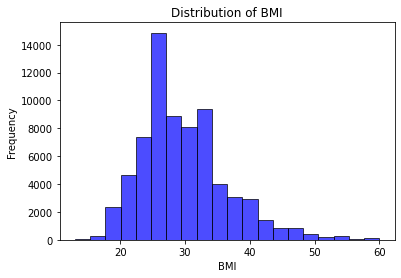

In [0]:
import matplotlib.pyplot as plt

df1_pandas = df1_filtered.select("BMI").toPandas()
plt.hist(df1_pandas["BMI"], bins=20, color="blue", alpha=0.7, edgecolor="black")
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()


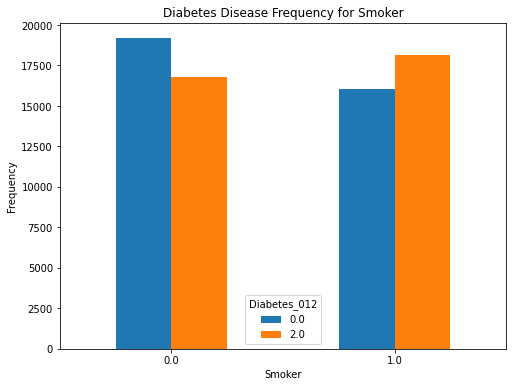

In [0]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import pandas as pd

df_grouped = df1_filtered.groupBy("Smoker", "Diabetes_012").count()

df_pandas = df_grouped.toPandas()

crosstab = pd.crosstab(df_pandas["Smoker"], df_pandas["Diabetes_012"], values=df_pandas["count"], aggfunc="sum", normalize=False)

crosstab.plot(kind="bar", figsize=(8, 6))

plt.title('Diabetes Disease Frequency for Smoker')
plt.xlabel("Smoker")
plt.ylabel('Frequency')
plt.xticks(rotation=0)  
plt.legend(title="Diabetes_012")
plt.show()


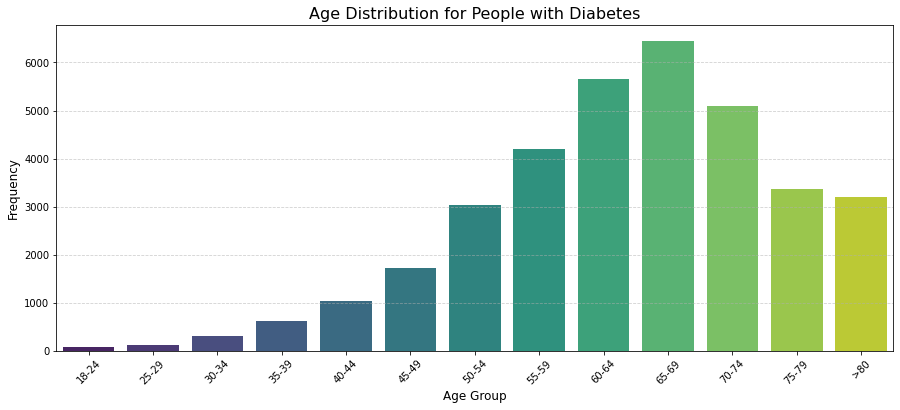

In [0]:
from pyspark.sql.functions import col, when
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_mapped = df1_filtered.withColumn(
    "Age_group",
    when(col("Age") == 1.0, "18-24")
    .when(col("Age") == 2.0, "25-29")
    .when(col("Age") == 3.0, "30-34")
    .when(col("Age") == 4.0, "35-39")
    .when(col("Age") == 5.0, "40-44")
    .when(col("Age") == 6.0, "45-49")
    .when(col("Age") == 7.0, "50-54")
    .when(col("Age") == 8.0, "55-59")
    .when(col("Age") == 9.0, "60-64")
    .when(col("Age") == 10.0, "65-69")
    .when(col("Age") == 11.0, "70-74")
    .when(col("Age") == 12.0, "75-79")
    .when(col("Age") == 13.0, ">80")
    .otherwise(None)
)

df_diabetics = df_mapped.filter(col("Diabetes_012") > 0)

df_pandas = df_diabetics.select("Age_group").toPandas()

age_counts = df_pandas["Age_group"].value_counts(sort=False)

age_labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80']

age_counts = age_counts.reindex(age_labels)

plt.figure(figsize=(15, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, palette="viridis")

plt.title('Age Distribution for People with Diabetes', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


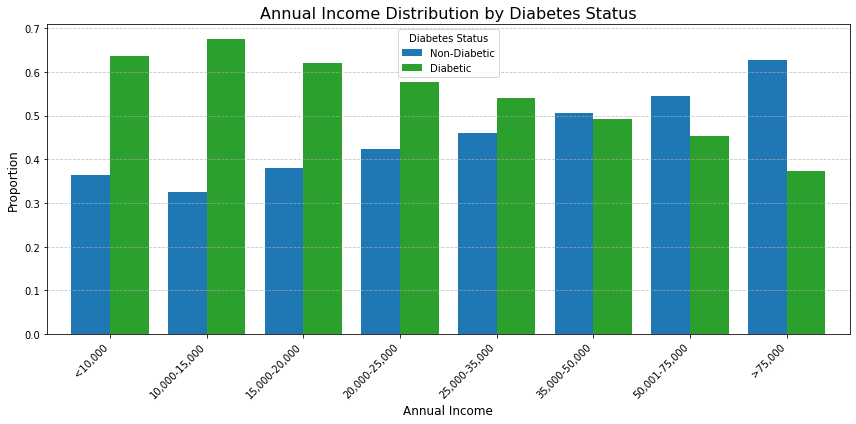

In [0]:
from pyspark.sql.functions import col
import pandas as pd
import matplotlib.pyplot as plt

income_diabetes_group = df1_filtered.groupBy("Income", "Diabetes_012").count()
income_diabetes_pandas = income_diabetes_group.toPandas()
income_labels = [
    "<10,000", "10,000-15,000", "15,000-20,000", "20,000-25,000",
    "25,000-35,000", "35,000-50,000", "50,001-75,000", ">75,000"
]

income_diabetes_pandas["Income"] = income_diabetes_pandas["Income"].astype(float).astype(int)
income_diabetes_pandas["Income"] = income_diabetes_pandas["Income"].map(lambda x: income_labels[x - 1])

pivot_data = income_diabetes_pandas.pivot(index="Income", columns="Diabetes_012", values="count").fillna(0)
pivot_data = pivot_data.reindex(income_labels)
pivot_data_normalized = pivot_data.div(pivot_data.sum(axis=1), axis=0)
custom_colors = ['#1f77b4', '#2ca02c']
ax = pivot_data_normalized.plot(kind="bar", figsize=(12, 6), width=0.8, color=custom_colors)

plt.title("Annual Income Distribution by Diabetes Status", fontsize=16)
plt.xlabel("Annual Income", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(["Non-Diabetic", "Diabetic"], title="Diabetes Status", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



<h2>Conclusion</h2>
<p>
This research sheds light on the factors that influence diabetes prevalence and distribution across several demographics, including age, income, and smoking behaviors. The results show that some age groups, notably those aged 55 and older, have a much greater prevalence of diabetes. Smoking status also plays an important effect, with smokers having a greater incidence of diabetes than nonsmokers. Furthermore, income levels have a complicated link with diabetes status, pointing to possible socioeconomic inequities in health outcomes.
</p>
<p>
These insights might help businesses plan focused healthcare programs, product development, and marketing strategies. For example, health organizations can concentrate on developing awareness campaigns for at-risk populations such as elderly persons and smokers. Insurance firms can utilize this information to improve their risk assessment and pricing algorithms. Furthermore, pharmaceutical businesses may use these information to create treatment regimens and preventative measures that cater to the individual requirements of certain demographics.
</p>
<p>
Overall, this initiative emphasizes the value of using data-driven insights to drive strategic decision-making, improve healthcare outcomes, and increase consumer engagement in industries such as healthcare, insurance, and wellness.
</p>